当前进度：698 / 802


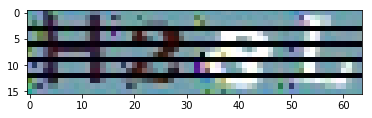

In [ ]:
import os,time,cv2,re
from PIL import Image
import matplotlib.pyplot as plt
from os.path import join
 

DataSet_Path = "WEBLMT_dataset"
# label_filename = "result"+str(int(time.time()))+".txt"
label_filename = "result.txt"

def rename_pic_file_random():
    num = 0
    suffix = '.png'
    for _,_,files in os.walk(DataSet_Path):
        for filename in files: 
            # temp_uuid = uuid.uuid1().hex
            # new_filename = '_%s.png' % (temp_uuid)
            num +=1
            new_filename = str(num).zfill(4)+suffix
            os.rename(join(DataSet_Path,filename),join(DataSet_Path,new_filename))



def lable_pic_manul():
    pic_num = 802
    with open(join(DataSet_Path,label_filename),'r') as f:
        lines = f.readlines()
        data_errors = list(filter(lambda line:re.match(r'[A-Za-z0-9_]{4}\n',line)==None,lines))
        if len(data_errors) >0:
            raise RuntimeError('数据错误:\n'+"\n".join(data_errors))
        num = len(lines)
    for _,_,files in os.walk(DataSet_Path):
        i=0
        for filename in files:
            i+=1
            if i<=num:
                continue
            if i>pic_num:
                break
            print("当前进度：%d / %d"%(i,pic_num)) 
            img_path = join(DataSet_Path,filename)
            img = cv2.imread(img_path)
            plt.imshow(img)
            plt.show()
            captcha = input("请输入验证码:\n")
            if captcha == '-1':
                break
            # lines.append(captcha+"\n")
            
            with open(join(DataSet_Path,label_filename),'a+') as f:
                f.write(captcha+"\n")


#rename_pic_file_random()
lable_pic_manul()